In [1]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import matplotlib.pyplot as plt
import random

In [2]:
# MNIST data -> 28pixel * 28pixel. this data made for post code number classification
# torchvision -> can use image dataset, models

In [3]:
# Initialize
USE_CUDA = torch.cuda.is_available()
print(USE_CUDA)
device = torch.device("cuda" if USE_CUDA else "cpu")
print(device)
# for reproducibility
random.seed(777)
torch.manual_seed(777)
if device == "cuda":
    torch.cuda.manual_seed_all(777)
# hyperparameters
training_epochs = 15
batch_size = 100
# train, test data
mnist_train = dsets.MNIST(root="MNIST_data/", train=True, transform=transforms.ToTensor(), download=True)
mnist_test = dsets.MNIST(root="MNIST_data/", train=False, transform=transforms.ToTensor(), download=True)

False
cpu


In [9]:
# dataset loader -> batch_size is splitted train data size, drop_last prevent few data makes overestimation.
data_loader = DataLoader(dataset=mnist_train, batch_size=batch_size, shuffle=True, drop_last=True)
# model if cpu dont't need to do it. to(device)
linear = nn.Linear(784, 19, bias=True).to(device)
# cost function & optimizeer
criterion = nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.SGD(linear.parameters(), lr=0.1)
# training
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = len(data_loader)
    for X, Y in data_loader:
        X = X.view(-1, 28*28).to(device)
        Y = Y.to(device)
        optimizer.zero_grad()
        hypothesis = linear(X)
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()
        avg_cost += cost / total_batch
    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))
print(list(linear.parameters()))
print('Learning finished')

Epoch: 0001 cost = 0.545618117
Epoch: 0002 cost = 0.360055417
Epoch: 0003 cost = 0.331717819
Epoch: 0004 cost = 0.316928059
Epoch: 0005 cost = 0.307513237
Epoch: 0006 cost = 0.300605923
Epoch: 0007 cost = 0.295045197
Epoch: 0008 cost = 0.291010052
Epoch: 0009 cost = 0.287675768
Epoch: 0010 cost = 0.284666777
Epoch: 0011 cost = 0.282105088
Epoch: 0012 cost = 0.279965281
Epoch: 0013 cost = 0.277848244
Epoch: 0014 cost = 0.276174456
Epoch: 0015 cost = 0.274743021
[Parameter containing:
tensor([[ 0.0183,  0.0253, -0.0326,  ..., -0.0016, -0.0334, -0.0183],
        [-0.0319,  0.0153, -0.0080,  ..., -0.0044,  0.0185, -0.0122],
        [-0.0206, -0.0221, -0.0154,  ...,  0.0310,  0.0246, -0.0088],
        ...,
        [ 0.0271,  0.0331,  0.0317,  ..., -0.0271,  0.0185, -0.0063],
        [ 0.0196, -0.0171, -0.0349,  ...,  0.0199,  0.0007,  0.0009],
        [-0.0211, -0.0025, -0.0094,  ...,  0.0232,  0.0124, -0.0033]],
       requires_grad=True), Parameter containing:
tensor([-0.4096,  0.5184,  0

Accuracy: 0.8827000260353088
Label:  1
Prediction:  1


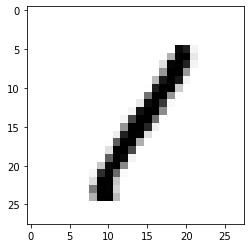

In [27]:
# model test
with torch.no_grad():
    X_test = mnist_test.test_data.view(-1, 28 * 28).float().to(device)
    Y_test = mnist_test.test_labels.to(device)
    prediction = linear(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())
    r = random.randint(0, len(mnist_test) - 1)
    X_single_data = mnist_test.test_data[r:r + 1].view(-1, 28 * 28).float().to(device)
    Y_single_data = mnist_test.test_labels[r:r + 1].to(device)
    print('Label: ', Y_single_data.item())
    single_prediction = linear(X_single_data)
    print('Prediction: ', torch.argmax(single_prediction, 1).item())
    plt.imshow(mnist_test.test_data[r:r + 1].view(28,28), cmap='Greys', interpolation='nearest')
    plt.show()

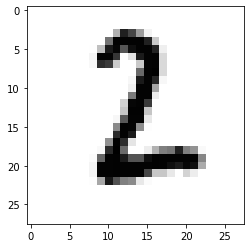

In [26]:
mnist_test.test_data.view(-1, 28 * 28).float()
r = random.randint(0, len(mnist_test) - 1)
plt.imshow(mnist_test.test_data[r:r + 1].view(28,28), cmap='Greys', interpolation='nearest')